# Projet Python data visualisation  

#### Modalité d’évaluation
4 compétences évaluées \
Notation sur 20 
#### Consignes
Votre analyse devra contenir :
- Au moins 1 diagramme avec données continues, type nuage de point ou histogramme
- Au moins 2 diagramme avec des données discrètes
- Au moins 3 graphiques avec des données catégoriques
- 1 boîte à moustaches avec filtrage des données aberrantes sur le dataset (si il y en a)
- 1 heat map avec matrice de corrélation (si pertinent)
- Des commentaires clairs et pertinents pour chaque graphiques 

-------------

#### Rappel
\- Une variable est dite __quantitative__ si elle est représentée par un nombre. \
*Un âge, une distance, une durée, une note sont des variables quantitatives.* \
\- Une variable qui n'est pas quantitative est __qualitative__.  \
*Une couleur, un diplôme, un prénom sont des variables qualitatives.* \
\- Une variable quantitative est dite __discrète__ si elle ne prend que des valeurs isolées. \
*Un âge, une note arrondie au demi−point sont des variables discrètes.* \
\- Une variable quantitative est dite __continue__ si elle peut prendre toutes les valeurs comprises entre 2 nombres. \
*La distance entre le domicile et le collège est une variable quantitative continue.*

-------------

### Import des librairies nécessaires

In [1]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

sns.set()

### Récupération et affichage des données

In [32]:
# https://www.kaggle.com/blastchar/telco-customer-churn
dataset = pd.read_csv("eval.csv")
dataset_sample = dataset.sample(100)
dataset

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,Age
0,7590-VHVEG,Female,0.0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,78
1,5575-GNVDE,Male,0.0,No,No,34,Yes,No,DSL,Yes,...,No,No,No,One year,No,Mailed check,56.95,1889.5,No,40
2,3668-QPYBK,Male,NaN,No,No,2,Yes,No,DSL,Yes,...,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,20
3,7795-CFOCW,Male,0.0,No,No,45,No,No phone service,DSL,Yes,...,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,45
4,9237-HQITU,Female,0.0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,49
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0.0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No,24
7039,2234-XADUH,Female,0.0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No,68
7040,4801-JZAZL,Female,0.0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No,44
7041,8361-LTMKD,Male,1.0,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes,90


In [34]:
# customerID        => Variable de catégorie    => Customer ID
# gender            => Variable de catégorie    => Whether the customer is a male or a female
# Age               => Variable discrète        => Age
# SeniorCitizen     => Variable discrète        => Whether the customer is a senior citizen or not (1, 0)
# Partner           => Variable de catégorie    => Whether the customer has a partner or not (Yes, No)
# Dependents        => Variable de catégorie    => Whether the customer has dependents or not (Yes, No)
# tenure            => Variable continue        => Number of months the customer has stayed with the company
# PhoneService      => Variable de catégorie    => Whether the customer has a phone service or not (Yes, No)
# MultipleLines     => Variable de catégorie    => Whether the customer has multiple lines or not (Yes, No, No phone service)
# InternetService   => Variable de catégorie    => Customer’s internet service provider (DSL, Fiber optic, No)
# OnlineSecurity    => Variable de catégorie    => Whether the customer has online security or not (Yes, No, No internet service)
# OnlineBackup      => Variable de catégorie    => Whether the customer has online backup or not (Yes, No, No internet service)
# DeviceProtection  => Variable de catégorie    => Whether the customer has device protection or not (Yes, No, No internet service)
# TechSupport       => Variable de catégorie    => Whether the customer has tech support or not (Yes, No, No internet service)
# StreamingTV       => Variable de catégorie    => Whether the customer has streaming TV or not (Yes, No, No internet service)
# StreamingMovies   => Variable de catégorie    => Whether the customer has streaming movies or not (Yes, No, No internet service)
# Contract          => Variable discrète        => The contract term of the customer (Month-to-month, One year, Two year)
# PaperlessBilling  => Variable de catégorie    => Whether the customer has paperless billing or not (Yes, No)
# PaymentMethod     => Variable de catégorie    => The customer’s payment method (Electronic check, Mailed check, Bank transfer (automatic), Credit card (automatic))
# MonthlyCharges    => Variable continue        => The amount charged to the customer monthly
# TotalCharges      => Variable continue        => The total amount charged to the customer
# Churn             => Variable de catégorie    => Whether the customer churned or not (Yes or No)

# Problématique
 Est-ce que les charges mensuelles des clients sont liées aux services supplémentaires ?

### Observation des charges en fonction de l'âge du client
*(Données continues)* \
Dans un premier temps on regarde si l'âge du client impacte sur ses charges mensuelles.

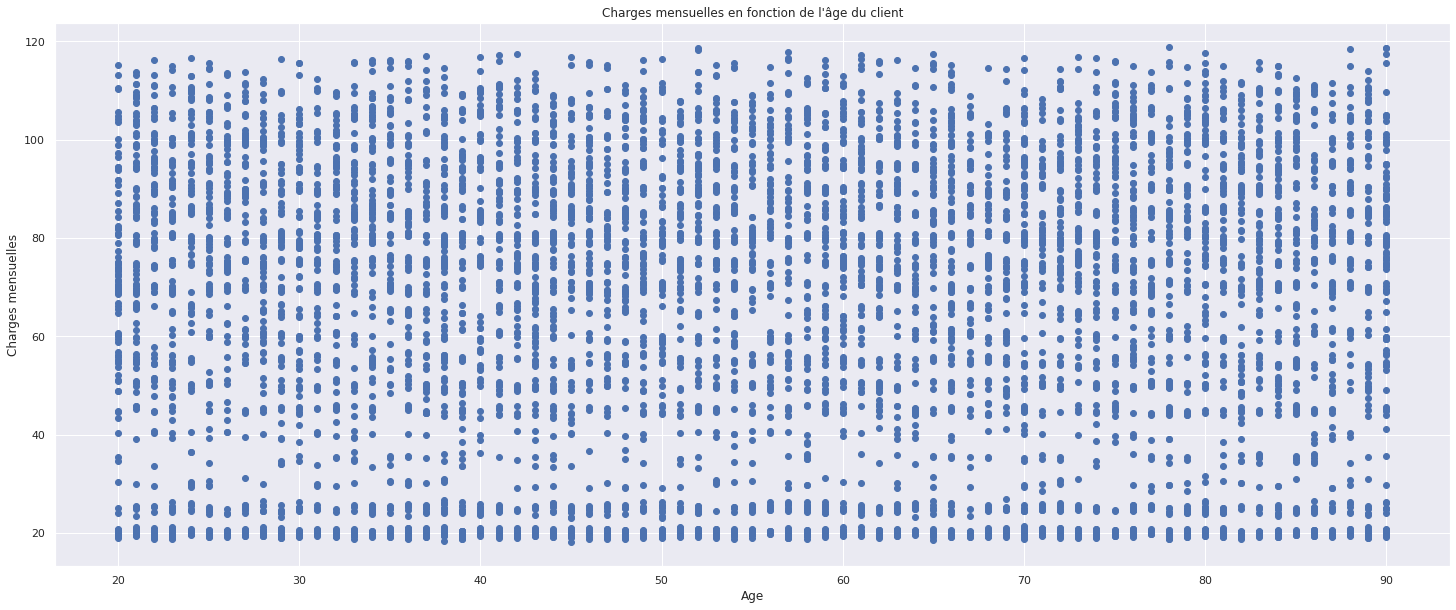

In [68]:
plt.scatter(dataset.loc[:, 'Age'], dataset.loc[:, 'MonthlyCharges'])
plt.gcf().set_size_inches((25, 10)) 

plt.title("Charges mensuelles en fonction de l'âge du client")
plt.xlabel('Age')
plt.ylabel('Charges mensuelles')

# plt.savefig('image.png')
plt.show()

Sur le graphique "Charges mensuelles en fonction de l'âge du client" on peut voir que les données récoltées semblent très homogènes. Si on retire quelques données pour avoir une vision plus claire de l'ensemble, on voit qu'elles sont très similaires.

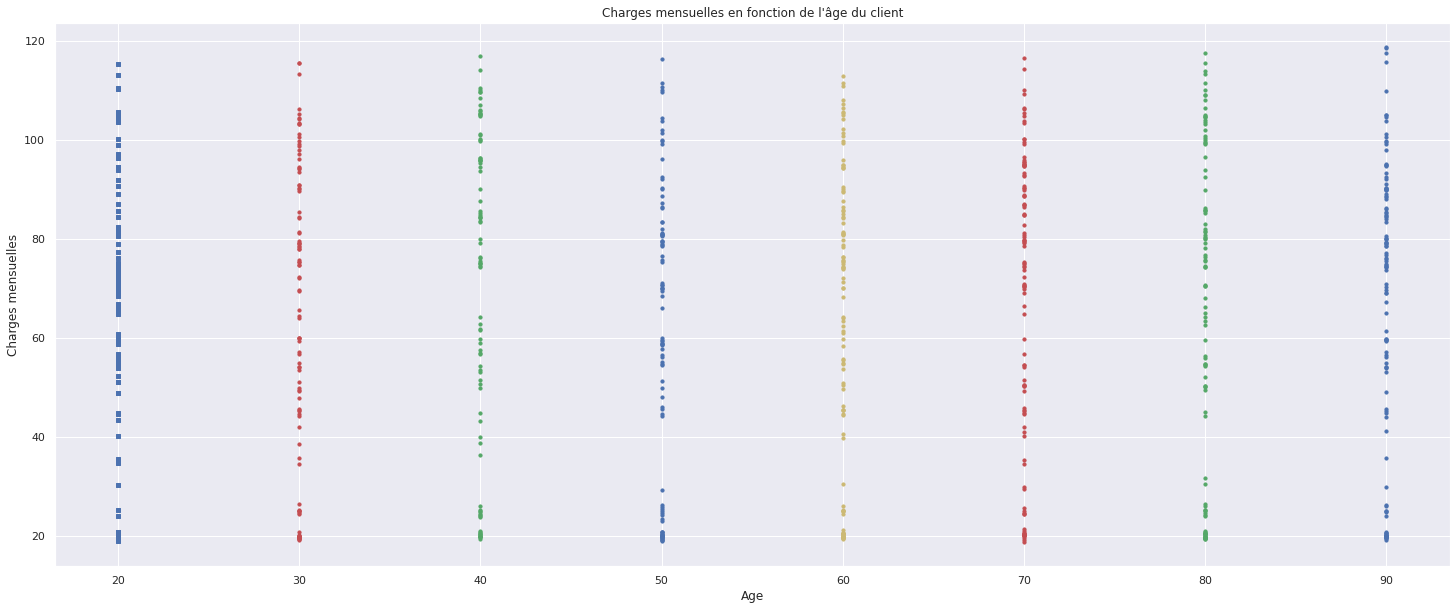

In [67]:
# Trie des données pour ne récupérer que certaines tranche d'âge
dataset_20 = dataset[dataset['Age'] == 20]
dataset_30 = dataset[dataset['Age'] == 30]
dataset_40 = dataset[dataset['Age'] == 40]
dataset_50 = dataset[dataset['Age'] == 50]
dataset_60 = dataset[dataset['Age'] == 60]
dataset_70 = dataset[dataset['Age'] == 70]
dataset_80 = dataset[dataset['Age'] == 80]
dataset_90 = dataset[dataset['Age'] == 90]

fig = plt.figure()
plt.gcf().set_size_inches((25, 10)) 
ax1 = fig.add_subplot(111)

plt.title("Charges mensuelles en fonction de l'âge du client")
plt.xlabel('Age')
plt.ylabel('Charges mensuelles')

ax1.scatter(dataset_20.loc[:, 'Age'], dataset_20.loc[:, 'MonthlyCharges'], s=10, c='b', marker="s", label='20 ans')
ax1.scatter(dataset_30.loc[:, 'Age'], dataset_30.loc[:, 'MonthlyCharges'], s=10, c='r', marker="o", label='30 ans')
ax1.scatter(dataset_40.loc[:, 'Age'], dataset_40.loc[:, 'MonthlyCharges'], s=10, c='g', marker="o", label='40 ans')
ax1.scatter(dataset_50.loc[:, 'Age'], dataset_50.loc[:, 'MonthlyCharges'], s=10, c='b', marker="o", label='50 ans')
ax1.scatter(dataset_60.loc[:, 'Age'], dataset_60.loc[:, 'MonthlyCharges'], s=10, c='y', marker="o", label='60 ans')
ax1.scatter(dataset_70.loc[:, 'Age'], dataset_70.loc[:, 'MonthlyCharges'], s=10, c='r', marker="o", label='70 ans')
ax1.scatter(dataset_80.loc[:, 'Age'], dataset_80.loc[:, 'MonthlyCharges'], s=10, c='g', marker="o", label='80 ans')
ax1.scatter(dataset_90.loc[:, 'Age'], dataset_90.loc[:, 'MonthlyCharges'], s=10, c='b', marker="o", label='90 ans')

plt.show()

------

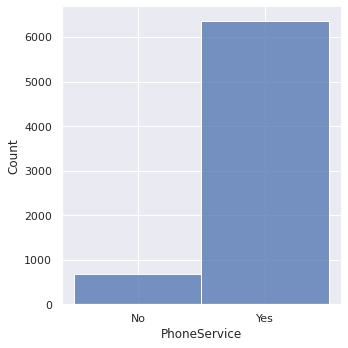

In [5]:
sns.displot(dataset.PhoneService) 

### Données discrètes (2)

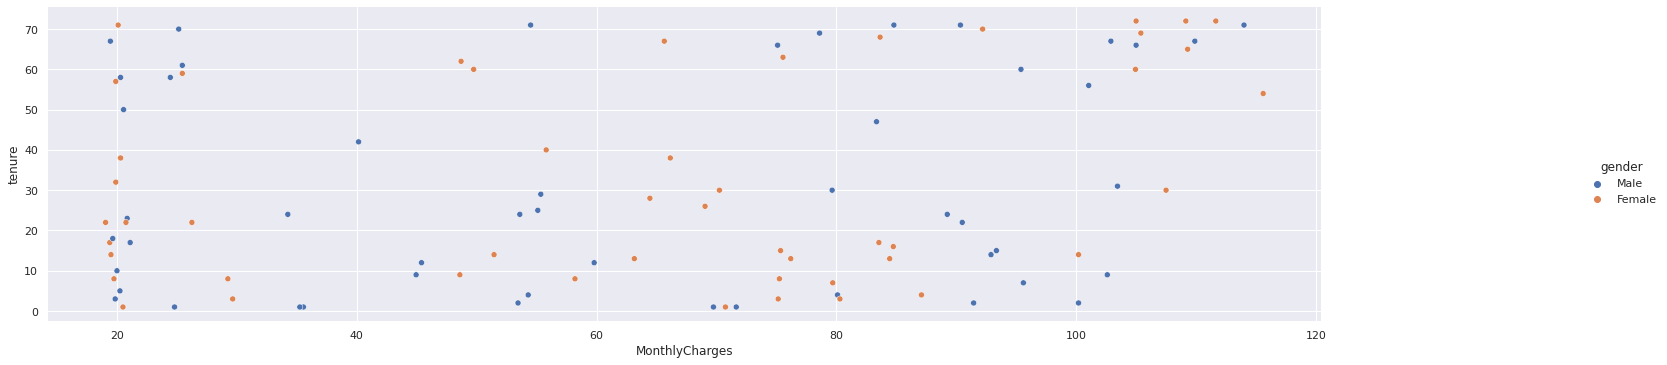

In [6]:
g = sns.relplot(data=dataset_sample, x="MonthlyCharges", y="tenure", hue="gender")
plt.gcf().set_size_inches((25, 5)) 
g.despine(left=True, bottom=True)

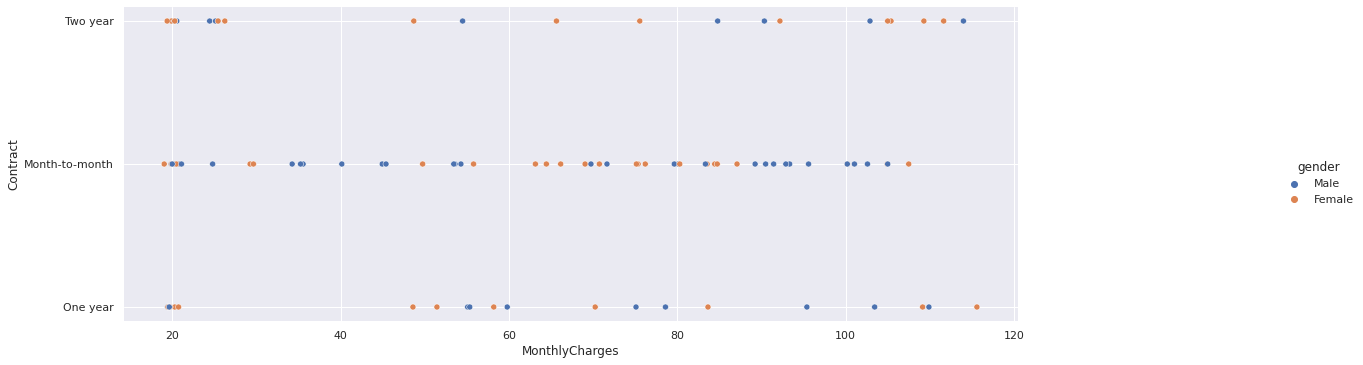

In [7]:
g = sns.relplot(data=dataset_sample, x="MonthlyCharges", y="Contract", hue="gender")
plt.gcf().set_size_inches((25, 5)) 
g.despine(left=True, bottom=True)

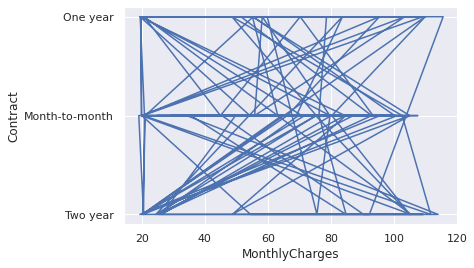

In [8]:
# plt.figure(figsize=(10,10))
# dataset.total_gross.plot(kind='bar');


x = dataset_sample.loc[:, 'MonthlyCharges']
y = dataset_sample.loc[:, 'Contract']

plt.plot(x,y)
# plt.gcf().set_size_inches((25, 5)) 

plt.xlabel('MonthlyCharges')
plt.ylabel('Contract')

# plt.savefig('image.png')
plt.show()

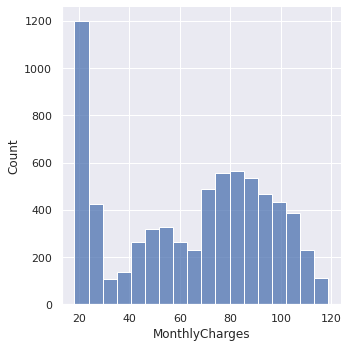

In [9]:
sns.displot(dataset.MonthlyCharges) 

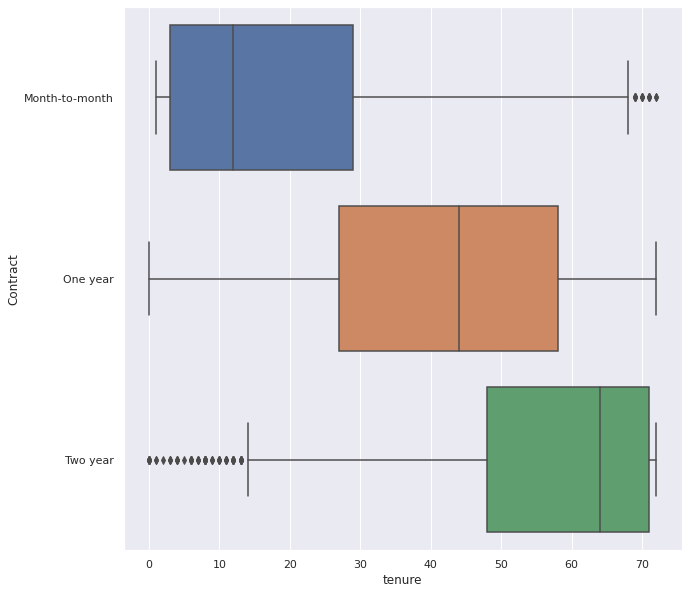

In [10]:
sns.boxplot(x="tenure", y="Contract", data=dataset)
plt.gcf().set_size_inches((10, 10)) 

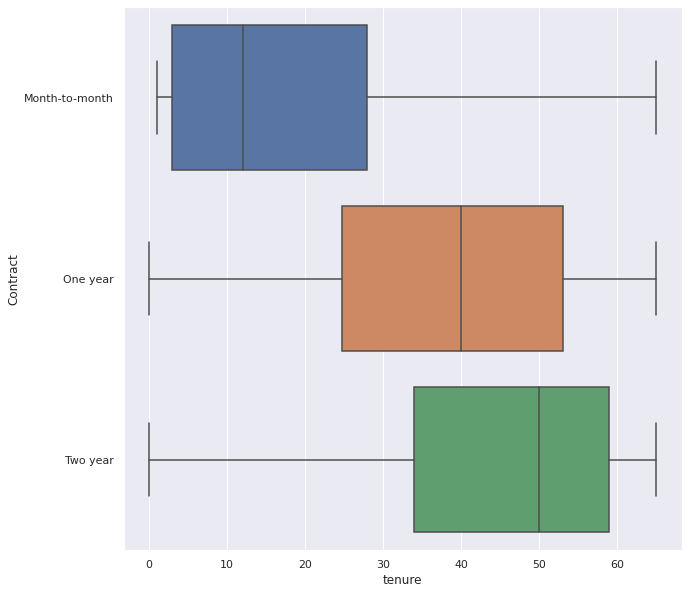

In [11]:
dataset_adjusted = dataset[(dataset['tenure'] < 66)]

sns.boxplot(x="tenure", y="Contract", data=dataset_adjusted)
plt.gcf().set_size_inches((10, 10)) 

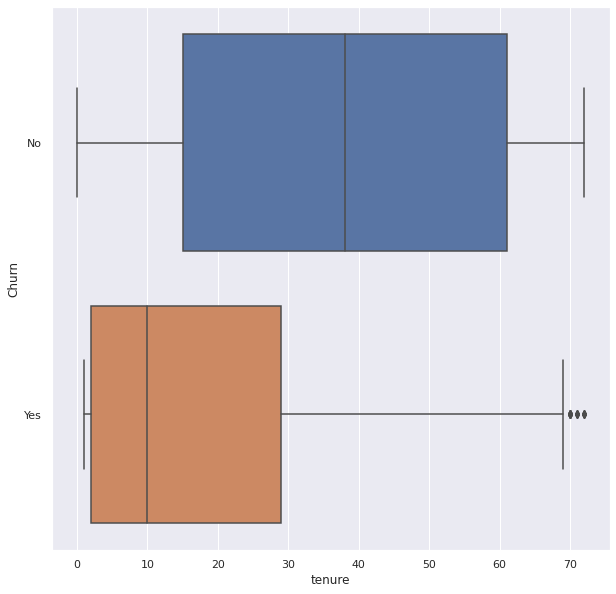

In [12]:
sns.boxplot(x="tenure", y="Churn", data=dataset)
plt.gcf().set_size_inches((10, 10)) 

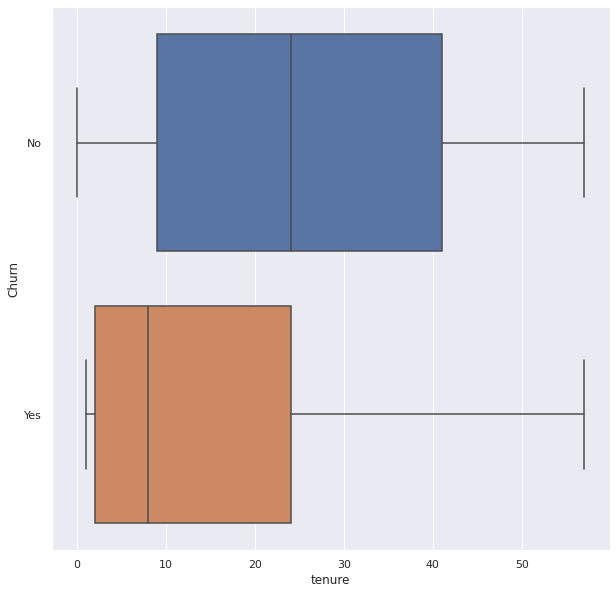

In [13]:
dataset_adjusted = dataset[dataset["tenure"] < 58]
sns.boxplot(x="tenure", y="Churn", data=dataset_adjusted)
plt.gcf().set_size_inches((10, 10)) 

TypeError: Neither the `x` nor `y` variable appears to be numeric.

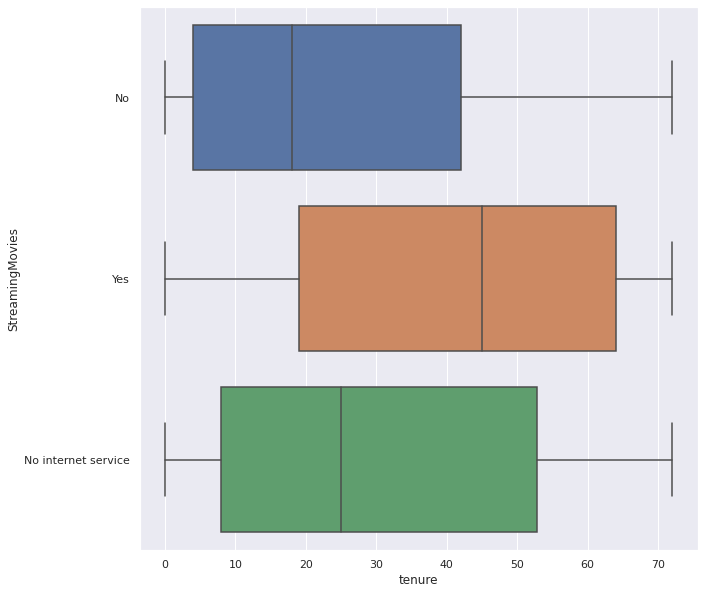

In [14]:
sns.boxplot(x="tenure", y="StreamingMovies", data=dataset) # TotalCharges
plt.gcf().set_size_inches((10, 10)) 

sns.boxplot(x="StreamingMovies", y="TotalCharges", data=dataset) # TotalCharges
plt.gcf().set_size_inches((10, 10)) 

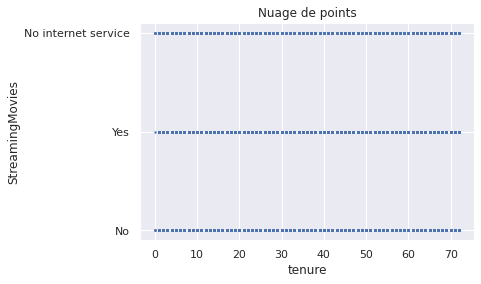

In [35]:
x = dataset.loc[:, 'tenure']
y = dataset.loc[:, 'StreamingMovies']

plt.scatter(x,y, 1.8)
# plt.gcf().set_size_inches((10, 10)) 

plt.title('Nuage de points')
plt.xlabel('tenure')
plt.ylabel('StreamingMovies')

# plt.savefig('exercice1.png')
plt.show()